In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

date_columns = ["Start", "Finish"]
df = pd.read_csv("gannt-file.csv").sort_values("Start", ascending=False)
for col in date_columns:
    df[col] = pd.to_datetime(df[col], dayfirst=True)
df["Diff"] = df.Finish - df.Start


df

,Task,Start,Finish,Type,Diff
4,Manuscript preparation,2021-09-01,2022-02-01,C,153 days
6,Machine Learning Voodoo,2021-09-01,2021-10-01,B,30 days
3,Machine Learning Voodoo,2021-07-01,2021-08-01,B,31 days
2,Data analysis,2021-05-01,2021-09-01,B,123 days
1,Data preprocessing,2021-03-01,2021-05-01,A,61 days
0,Data collection,2021-01-01,2021-03-01,A,59 days
5,Drinking coffee,2021-01-01,2022-02-01,D,396 days


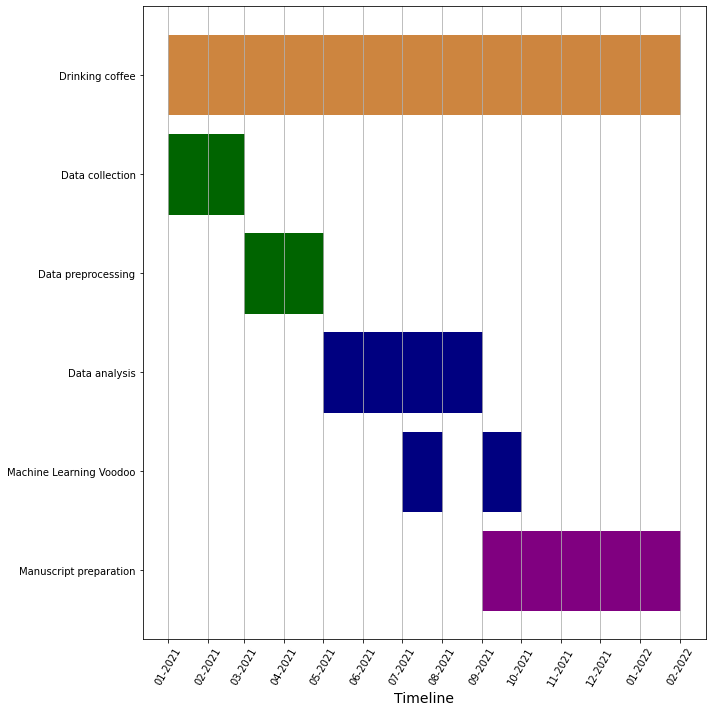

In [6]:
color = {"A":"darkgreen", 
         "B":"navy", 
         "C":"purple",
         "D":"peru"}
fig,ax=plt.subplots(figsize=(10,10))

labels=[]

for i, task in enumerate(df.groupby("Task", sort=False)):
    labels.append(task[0])
    for r in task[1].groupby("Type"):
        data = r[1][["Start", "Diff"]]
        ax.broken_barh(data.values, (i-0.4,0.8), color=color[r[0]])

ax.set_yticks(range(len(labels)))
ax.set_yticklabels(labels) 
ax.set_xlabel("Timeline", fontsize=14)
date_form = DateFormatter("%m-%Y")
locator = mdates.MonthLocator()

ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(locator)

plt.setp(ax.get_xticklabels(), rotation=60)

ax.xaxis.grid()

plt.tight_layout()       
fig.savefig('gannt-chart.png', dpi=600)